## Visualization of input data

In [2]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib.dates as mdates
#import seaborn as sns
import datetime
import pandas as pd
#% matplotlib inline
#np.set_printoptions(threshold=np.nan)
import time

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

### Read data from BEopt output

In [3]:
Data_df = pd.read_csv("data/200124_datafile_all_details.csv");

In [4]:
Data_df.head() #show first 5 lines

,heating,heating_fan,hotwater,lights,lgappl,vent_fan,misc,electkwh,heatingkwh,hotwaterkwh,Date/Time,PV_generation,Temperature
0,3.736686,0.044709,0.0,0.022749,0.042381,0.0,0.176259,0.241389,3.781395,0.0,01/01 01:00:00,0.0,-7.488
1,3.837678,0.035999,0.0,0.013649,0.041584,0.0,0.166187,0.221420,3.873677,0.0,01/01 02:00:00,0.0,-7.637
2,6.059491,0.041142,0.0,0.009099,0.036289,0.0,0.161151,0.206539,6.100633,0.0,01/01 03:00:00,0.0,-7.813
3,2.423797,0.041142,0.0,0.009099,0.035492,0.0,0.156115,0.200706,2.464939,0.0,01/01 04:00:00,0.0,-7.984
4,1.211898,0.041142,0.0,0.010117,0.039192,0.0,0.161151,0.210460,1.253040,0.0,01/01 05:00:00,0.0,-8.147


In [5]:
Data_df.dtypes # check types/ columns

heating          float64
heating_fan      float64
hotwater         float64
lights           float64
lgappl           float64
vent_fan         float64
misc             float64
electkwh         float64
heatingkwh       float64
hotwaterkwh      float64
Date/Time         object
PV_generation    float64
Temperature      float64
dtype: object

### Change time stamp

In [6]:
Data_df["Date/Time"][:10] # date/time problematic, needs to start with 0...23

0     01/01  01:00:00
1     01/01  02:00:00
2     01/01  03:00:00
3     01/01  04:00:00
4     01/01  05:00:00
5     01/01  06:00:00
6     01/01  07:00:00
7     01/01  08:00:00
8     01/01  09:00:00
9     01/01  10:00:00
Name: Date/Time, dtype: object

In [7]:
# change hour format from 1-24 tp 0-23
Data_df["Date/Time"]=Data_df["Date/Time"].str.replace('24:', '00:', regex=True)

In [8]:
#format time stamp
Data_df["month"] = pd.to_datetime(Data_df["Date/Time"], format=" %m/%d  %H:%M:%S").dt.month
Data_df["day"] = pd.to_datetime(Data_df["Date/Time"], format=" %m/%d  %H:%M:%S").dt.day
Data_df["hour"] = pd.to_datetime(Data_df["Date/Time"], format=" %m/%d  %H:%M:%S").dt.hour -1
Data_df.drop("Date/Time", axis=1, inplace=True)
Data_df.tail()

,heating,heating_fan,hotwater,lights,lgappl,vent_fan,misc,electkwh,heatingkwh,hotwaterkwh,PV_generation,Temperature,month,day,hour
8755,3.635695,0.041142,0.401293,0.164025,0.178012,0.0,0.251798,0.593835,3.676837,0.401293,0.0,-5.897,12,31,19
8756,2.423797,0.044570,0.000000,0.125711,0.133016,0.0,0.236691,0.495418,2.468367,0.000000,0.0,-6.220,12,31,20
8757,4.847593,0.037713,0.000000,0.096602,0.074150,0.0,0.226619,0.397371,4.885306,0.000000,0.0,-6.302,12,31,21
8758,2.423797,0.041142,0.000000,0.086732,0.059063,0.0,0.201439,0.347234,2.464939,0.000000,0.0,-6.056,12,31,22
8759,2.423797,0.041142,0.392360,0.045814,0.049175,0.0,0.181295,0.276284,2.464939,0.392360,0.0,-5.947,12,31,-1


In [9]:
# change hour format from 1-24 tp 0-23
Data_df["hour"] = Data_df["hour"].replace(-1, 23)

In [10]:
Data_df[["day","hour"]][:25]

,day,hour
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4
5,1,5
6,1,6
7,1,7
8,1,8
9,1,9


In [11]:
Data_df[:][0:25]

,heating,heating_fan,hotwater,lights,lgappl,vent_fan,misc,electkwh,heatingkwh,hotwaterkwh,PV_generation,Temperature,month,day,hour
0,3.736686,0.044709,0.000000,0.022749,0.042381,0.000,0.176259,0.241389,3.781395,0.000000,0.000,-7.488,1,1,0
1,3.837678,0.035999,0.000000,0.013649,0.041584,0.000,0.166187,0.221420,3.873677,0.000000,0.000,-7.637,1,1,1
2,6.059491,0.041142,0.000000,0.009099,0.036289,0.000,0.161151,0.206539,6.100633,0.000000,0.000,-7.813,1,1,2
3,2.423797,0.041142,0.000000,0.009099,0.035492,0.000,0.156115,0.200706,2.464939,0.000000,0.000,-7.984,1,1,3
4,1.211898,0.041142,0.000000,0.010117,0.039192,0.000,0.161151,0.210460,1.253040,0.000000,0.000,-8.147,1,1,4
5,0.000000,0.041142,0.000000,0.027759,0.045189,0.000,0.166187,0.239135,0.041142,0.000000,0.000,-8.221,1,1,5
6,4.847593,0.041142,0.000000,0.065169,0.067773,0.025,0.186331,0.344273,4.888735,0.000000,0.000,-8.256,1,1,6
7,4.847593,0.041142,0.000000,0.082470,0.094854,0.005,0.211511,0.393835,4.888735,0.000000,0.524,-8.197,1,1,7
8,4.241644,0.044570,1.245169,0.087643,0.101649,0.000,0.216547,0.405839,4.286214,1.245169,3.870,-7.428,1,1,8
9,3.029746,0.041142,3.355036,0.090090,0.104647,0.000,0.216547,0.411284,3.070888,3.355036,6.419,-6.125,1,1,9


In [25]:
Data_df.columns

Index(['heating', 'heating_fan', 'hotwater', 'lights', 'lgappl', 'vent_fan',
       'misc', 'electkwh', 'heatingkwh', 'hotwaterkwh', 'PV_generation',
       'Temperature', 'month', 'day', 'hour'],
      dtype='object')

In [13]:
Data_df.to_csv("data/200124_datafile_all_details_right_timestamp.csv", index=False)

### Aggregate values per month and hour

In [14]:
Data_df_mean = Data_df.groupby(['month', 'hour'], as_index=False).mean()
Data_df_mean.drop("day", axis=1, inplace=True)

In [15]:
Data_df_mean.head()

,month,hour,heating,heating_fan,hotwater,lights,lgappl,vent_fan,misc,electkwh,heatingkwh,hotwaterkwh,PV_generation,Temperature
0,1,0,4.152013,0.041146,0.256580,0.022749,0.064627,0.0,0.176259,0.263635,4.193160,0.256580,0.0,-5.329935
1,1,1,4.391493,0.040976,0.030513,0.013649,0.047451,0.0,0.166187,0.227287,4.432469,0.030513,0.0,-5.543742
2,1,2,4.188169,0.041142,0.025315,0.009099,0.036289,0.0,0.161151,0.206539,4.229311,0.025315,0.0,-5.682774
3,1,3,4.577854,0.041142,0.065320,0.009099,0.035492,0.0,0.156115,0.200706,4.618996,0.065320,0.0,-5.783968
4,1,4,4.362378,0.041253,0.000000,0.010117,0.039464,0.0,0.161151,0.210732,4.403631,0.000000,0.0,-5.900548


### Illustrate hot water loads

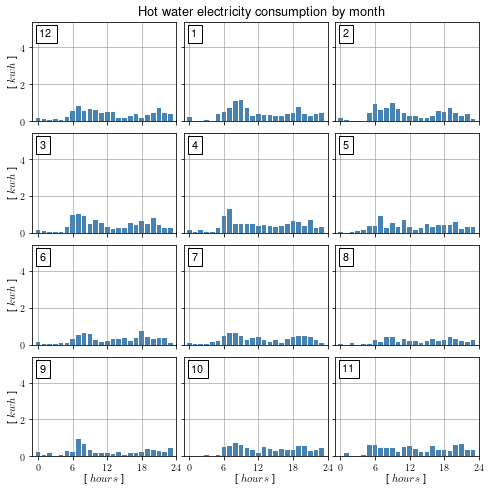

In [16]:
x_axis = np.arange(0,24,1);
fig = pl.subplots(figsize=(8,8));
pl.subplots_adjust(hspace=0.12, wspace=0.05);

# Plots very first upper left
pl.subplot(4,3,1);

pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == 12]['hotwater'][:], #+ Data_df_mean.loc[Data_df_mean['month'] == 12]['hotwater_suppl'][:], 
       label='HW', color= "steelblue");

#pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == 12]['hotwater_suppl'][:], label='HW_suppl', color="lightblue");

pl.annotate("12",xy=(0.4,4.6), fontsize=11, bbox={'facecolor':'white'});
pl.title('Hot water electricity consumption by month', fontsize=13, x=1.6);
pl.ylim(0, 5.4); pl.xlim(-1, 24);
pl.xticks(np.arange(0,25,6)); 
pl.ylabel('[ $kwh$ ]', fontsize=11, labelpad=3);
ax=pl.gca();
ax.axes.xaxis.set_ticklabels([]);
ax.grid(color='grey', linestyle='-', linewidth=0.5);

# Plots others in loop
for i in np.arange(2,13):
    pl.subplot(4,3,i);
    
    pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['hotwater'][:], #+ Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['hotwater_suppl'][:], 
       label='HW', color= "steelblue");

    #pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['hotwater_suppl'][:], label='HW_suppl', color="lightblue");
    
    pl.annotate(i-1,xy=(0.4,4.6), fontsize=11, bbox={'facecolor':'white'});
    pl.ylim(0, 5.4); pl.xlim(-1, 24);
    pl.xticks(np.arange(0,25,6)); 
    pl.ylabel('[ $kwh$ ]', fontsize=11, labelpad=3);
    pl.xlabel('[ $hours$ ]', fontsize=11, labelpad=1);
    ax=pl.gca();
    ax.grid(color='grey', linestyle='-', linewidth=0.5);
    if not i in [1,4,7,10]:
        ax.axes.yaxis.set_ticklabels([]);
        pl.ylabel(None);
    
    if not i in np.arange(10,13):
        ax.axes.xaxis.set_ticklabels([]);
        pl.xlabel(None);
        
#pl.savefig('../latex/pics/HotWaterConsumption_v2.svg', bbox_inches='tight');
#pl.savefig('../latex/pics/HotWaterConsumption_v2.pgf', bbox_inches='tight');

### Illustrate heating loads

In [24]:
Data_df.sum()

heating           11704.250729
heating_fan         176.529919
hotwater           3018.414370
lights              611.407236
lgappl              994.430470
vent_fan             21.900000
misc               1469.891241
electkwh           3097.628947
heatingkwh        11880.780648
hotwaterkwh        3018.414370
PV_generation     16585.591000
Temperature       85657.602000
month             57168.000000
day              137712.000000
hour             100740.000000
dtype: float64

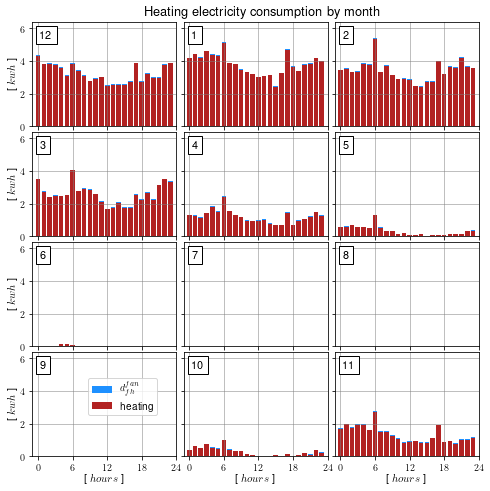

In [30]:
x_axis = np.arange(0,24,1);
fig = pl.subplots(figsize=(8,8));  
pl.subplots_adjust(hspace=0.05, wspace=0.05);

# Plots very first upper left
pl.subplot(4,3,1)

pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == 12]['heating_fan'][:] + Data_df_mean.loc[Data_df_mean['month'] == 12]['heating'][:],  
       label=' $d_{fh}^{fan}$ ', color= "dodgerblue");

pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == 12]['heating'][:], label='heating', color="firebrick");

pl.annotate("12",xy=(.4, 5.4), fontsize=11, bbox={'facecolor':'white'});
pl.title('Heating electricity consumption by month', fontsize=13, x=1.6);
pl.ylim(0, 6.4); pl.xlim(-1, 24);
pl.xticks(np.arange(0,25,6)); 
pl.ylabel('[ $kwh$ ]', fontsize=11, labelpad=3);
ax=pl.gca();
ax.axes.xaxis.set_ticklabels([]);
ax.grid(color='grey', linestyle='-', linewidth=0.5);

# Plots others in loop
for i in np.arange(2,13):
    pl.subplot(4,3,i)

    pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['heating_fan'][:] + Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['heating'][:], 
           label=' $d_{fh}^{fan}$ ', color= "dodgerblue");

    pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['heating'][:], label='heating', color="firebrick");
    
    pl.annotate(i-1,xy=(.4, 5.4), fontsize=11, bbox={'facecolor':'white'});
    pl.ylim(0, 6.4); pl.xlim(-1, 24);
    pl.xticks(np.arange(0,25,6)); 
    pl.ylabel('[ $kwh$ ]', fontsize=11, labelpad=3);
    pl.xlabel('[ $hours$ ]', fontsize=11, labelpad=1);
    ax=pl.gca();
    ax.grid(color='grey', linestyle='-', linewidth=0.5);
    if not i in [1,4,7,10]:
        ax.axes.yaxis.set_ticklabels([]);
        pl.ylabel(None);
        
    if not i in np.arange(10,13):
        ax.axes.xaxis.set_ticklabels([]);
        pl.xlabel(None);
    
    if i == 12:
        ax.legend(bbox_to_anchor=(-1.2, 0.8));

#pl.savefig('../latex/pics/HeatingConsumption_v2.svg', bbox_inches='tight');
#pl.savefig('../latex/pics/HeatingConsumption_v2.pgf', bbox_inches='tight');

### Demand all combined

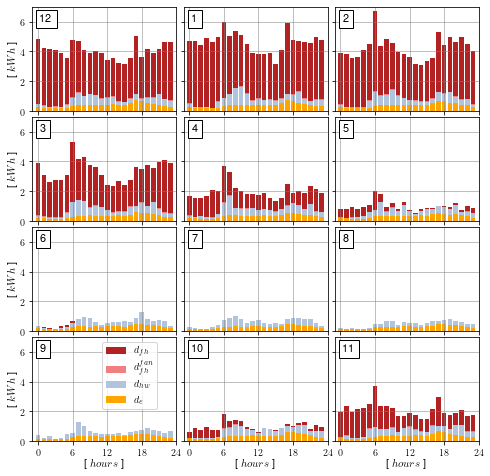

In [19]:
x_axis = np.arange(0,24,1);
fig = pl.subplots(figsize=(8,8));  
pl.subplots_adjust(hspace=0.05, wspace=0.05);

# Plots very first upper left
pl.subplot(4,3,1)

pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == 12]['electkwh'][:] + Data_df_mean.loc[Data_df_mean['month'] == 12]['heating_fan'][:] + Data_df_mean.loc[Data_df_mean['month'] == 12]['heating'][:] + Data_df_mean.loc[Data_df_mean['month'] == 12]['hotwater'][:], # + Data_df_mean.loc[Data_df_mean['month'] == 12]['heating_suppl'][:], 
       label=' $d_{fh}$ ', color="firebrick");

pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == 12]['electkwh'][:] + Data_df_mean.loc[Data_df_mean['month'] == 12]['heating_fan'][:] + Data_df_mean.loc[Data_df_mean['month'] == 12]['hotwater'][:], 
       label=' $d_{fh}^{fan}$ ', color= "lightcoral");

pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == 12]['electkwh'][:] + Data_df_mean.loc[Data_df_mean['month'] == 12]['hotwater'][:], #+ Data_df_mean.loc[Data_df_mean['month'] == 12]['hotwater_suppl'][:], 
       label=' $d_{hw}$ ', color= "lightsteelblue");

pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == 12]['electkwh'][:], #+ Data_df_mean.loc[Data_df_mean['month'] == 12]['hotwater_suppl'][:], 
       label=' $d_e$ ', color= "orange");

#pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == 12]['heating'][:] + Data_df_mean.loc[Data_df_mean['month'] == 12]['heating_suppl'][:], 
#       label='heating_suppl', color= "tomato");

pl.annotate("12",xy=(.4, 6), fontsize=11, bbox={'facecolor':'white'});
#pl.title('Heating demand by month', fontsize=13, x=1.6);
pl.ylim(0, 7); pl.xlim(-1, 24);
pl.xticks(np.arange(0,25,6)); 
pl.ylabel('[ $kWh$ ]', fontsize=11, labelpad=3);
ax=pl.gca();
ax.axes.xaxis.set_ticklabels([]);
ax.grid(color='grey', linestyle='-', linewidth=0.5);

# Plots others in loop
for i in np.arange(2,13):
    pl.subplot(4,3,i)
    
    pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['electkwh'][:] + Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['heating_fan'][:] + Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['heating'][:] + Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['hotwater'][:], # + Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['heating_suppl'][:], 
           label=' $d_{fh}$ ', color="firebrick");

    pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['electkwh'][:] + Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['heating_fan'][:] + Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['hotwater'][:],
       label=' $d_{fh}^{fan}$ ', color= "lightcoral");
    
    pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['electkwh'][:] + Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['hotwater'][:], #+ Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['hotwater_suppl'][:], 
       label=' $d_{hw}$ ', color= "lightsteelblue");

   # pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['heating'][:] + Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['heating_suppl'][:], 
   #    label='heating_suppl', color= "tomato");
    
    pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['electkwh'][:], #+ Data_df_mean.loc[Data_df_mean['month'] == 12]['hotwater_suppl'][:], 
       label=' $d_{e}$ ', color= "orange");

    
    pl.annotate(i-1,xy=(.4, 6), fontsize=11, bbox={'facecolor':'white'});
    pl.ylim(0, 7); pl.xlim(-1, 24);
    pl.xticks(np.arange(0,25,6)); 
    pl.ylabel('[ $kWh$ ]', fontsize=11, labelpad=3);
    pl.xlabel('[ $hours$ ]', fontsize=11, labelpad=1);
    ax=pl.gca();
    ax.grid(color='grey', linestyle='-', linewidth=0.5);
    if not i in [1,4,7,10]:
        ax.axes.yaxis.set_ticklabels([]);
        pl.ylabel(None);
        
    if not i in np.arange(10,13):
        ax.axes.xaxis.set_ticklabels([]);
        pl.xlabel(None);
    
    if i == 12:
        ax.legend(bbox_to_anchor=(-1.2, 1));

#pl.savefig('../latex/pics/OverallDemand.svg', bbox_inches='tight');
#pl.savefig('../latex/pics/OverallDemand.pgf', bbox_inches='tight');
#pl.savefig('../latex/pics/OverallDemand.pdf', bbox_inches='tight');

### Illustrate electricity loads

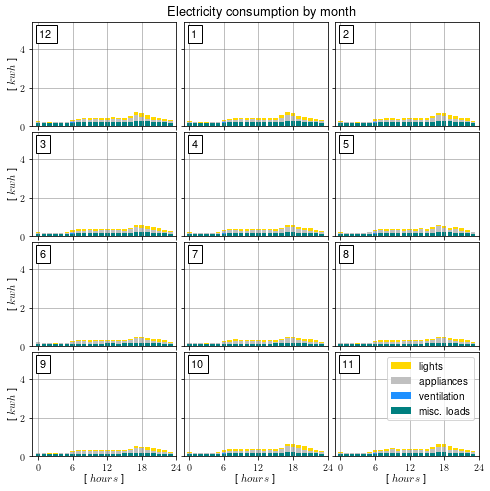

In [20]:
x_axis = np.arange(0,24,1);
fig = pl.subplots(figsize=(8,8));
pl.subplots_adjust(hspace=0.05, wspace=0.05);

# Plots very first upper left
pl.subplot(4,3,1)

pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == 12]['lights'][:] 
               + Data_df_mean.loc[Data_df_mean['month'] == 12]['lgappl'][:] 
               + Data_df_mean.loc[Data_df_mean['month'] == 12]['vent_fan'][:]
               + Data_df_mean.loc[Data_df_mean['month'] == 12]['misc'][:], 
       label='lights', color= "gold");

pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == 12]['lgappl'][:] 
               + Data_df_mean.loc[Data_df_mean['month'] == 12]['vent_fan'][:]
               + Data_df_mean.loc[Data_df_mean['month'] == 12]['misc'][:], 
       label='lgappl', color= "silver");

pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == 12]['vent_fan'][:]
               + Data_df_mean.loc[Data_df_mean['month'] == 12]['misc'][:],
       label='vent_fan', color="dodgerblue");

pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == 12]['misc'][:],
       label='misc', color="teal");

pl.annotate("12",xy=(.4,4.6), fontsize=11, bbox={'facecolor':'white'});
pl.title('Electricity consumption by month', fontsize=13, x=1.6);
pl.ylim(0, 5.4); pl.xlim(-1, 24);
pl.xticks(np.arange(0,25,6)); 
pl.ylabel('[ $kwh$ ]', fontsize=11, labelpad=3);
ax=pl.gca();
ax.axes.xaxis.set_ticklabels([]);
ax.grid(color='grey', linestyle='-', linewidth=0.5);

# Plots others in loop
for i in np.arange(2,13):
    pl.subplot(4,3,i)

    pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['lights'][:] 
                   + Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['lgappl'][:] 
                   + Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['vent_fan'][:]
                   + Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['misc'][:], 
           label='lights', color= "gold");

    pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['lgappl'][:] 
                   + Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['vent_fan'][:]
                   + Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['misc'][:], 
           label='appliances', color= "silver");

    pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['vent_fan'][:]
                   + Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['misc'][:],
           label='ventilation', color="dodgerblue");

    pl.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['misc'][:],
           label='misc. loads', color="teal");
    
    pl.annotate(i-1,xy=(.4,4.6), fontsize=11, bbox={'facecolor':'white'});
    pl.ylim(0, 5.4); pl.xlim(-1, 24);
    pl.xticks(np.arange(0,25,6)); 
    pl.ylabel('[ $kwh$ ]', fontsize=11, labelpad=3);
    pl.xlabel('[ $hours$ ]', fontsize=11, labelpad=1);
    ax=pl.gca();
    ax.grid(color='grey', linestyle='-', linewidth=0.5);
    if not i in [1,4,7,10]:
        ax.axes.yaxis.set_ticklabels([]);
        pl.ylabel(None);
        
    if not i in np.arange(10,13):
        ax.axes.xaxis.set_ticklabels([]);
        pl.xlabel(None);
    
    if i == 12:
        ax.legend(bbox_to_anchor=(1, 1));
#pl.savefig('../latex/pics/ElectricityConsumption_v2.svg', bbox_inches='tight');

### Illustrate PV generation

In [21]:
Data_df_mean.loc[Data_df_mean['month'] == 2]['Temperature'][:]

24    -9.631286
25    -9.917429
26   -10.141250
27   -10.297464
28   -10.476107
29   -10.683357
30   -10.838036
31   -10.400571
32    -9.426857
33    -8.468571
34    -7.563286
35    -6.796964
36    -6.244821
37    -5.887000
38    -5.746179
39    -5.929143
40    -6.553929
41    -7.458536
42    -7.989321
43    -8.396607
44    -8.756107
45    -9.079143
46    -9.343214
47    -9.619500
Name: Temperature, dtype: float64

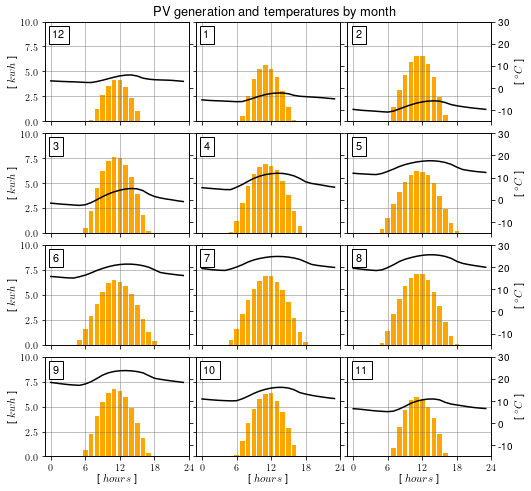

In [22]:
x_axis = np.arange(0,24,1);
fig = pl.figure(figsize=(8,8));
pl.subplots_adjust(hspace=0.12, wspace=0.05);

# Plots very first upper left
ax1 = fig.add_subplot(4,3,1);
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax1.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == 12]['PV_generation'][:], color= "orange");
ax2.plot(x_axis, Data_df_mean.loc[Data_df_mean['month'] == 12]['Temperature'][:], color= "black");

ax1.annotate("12",xy=(.4,8.4), fontsize=11, bbox={'facecolor':'white'});
pl.title('PV generation and temperatures by month', fontsize=13, x=1.6);

ax1.set_xticks(np.arange(0,25,6)); 
ax1.set_ylabel('[ $kwh$ ]', fontsize=11, labelpad=3);
ax1.axes.xaxis.set_ticklabels([]);
ax1.grid(color='grey', linestyle='-', linewidth=0.5);
ax1.set_ylim([0, 10]); ax2.set_ylim([-15, 30]); ax1.set_xlim([-1, 24]); 



# Plots others in loop
for i in np.arange(2,13):
    ax1=fig.add_subplot(4,3,i);
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax1.bar(x_axis, Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['PV_generation'][:], color= "orange");
    ax2.plot(x_axis, Data_df_mean.loc[Data_df_mean['month'] == (i-1)]['Temperature'][:], color= "black");
    
    ax1.annotate(i-1,xy=(.4,8.4), fontsize=11, bbox={'facecolor':'white'});
    

    ax1.set_xticks(np.arange(0,25,6)); 
    ax2.set_yticks(np.arange(-10,31,10));
    ax2.set_yticklabels(np.arange(-10,31,10));  
    ax1.set_ylabel('[ $kwh$ ]', fontsize=11, labelpad=3);
    ax2.set_ylabel('[ $^{\circ}C$ ]', fontsize=11, labelpad=1);    
    ax1.set_xlabel('[ $hours$ ]', fontsize=11, labelpad=1);
    ax1.grid(color='grey', linestyle='-', linewidth=0.5);
    ax1.set_ylim([0, 10]);  ax2.set_ylim([-15, 30]); ax1.set_xlim([-1, 24]);
    
    if not i in [1,4,7,10]:
        ax1.axes.yaxis.set_ticklabels([]);
        ax1.set_ylabel(None);
    
    if not i in np.arange(10,13):
        ax1.axes.xaxis.set_ticklabels([]);
        ax1.set_xlabel(None);

    if not i in [3,6,9,12]:
        ax2.axes.yaxis.set_ticklabels([]);
        ax2.set_ylabel(None);
        
#pl.savefig('../latex/pics/PV_generation_temp_v2.svg', bbox_inches='tight');